In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from skimage.feature import hog
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from skimage.feature import daisy
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array
from keras.utils import load_img


In [3]:
DATADIR = 'D:\CV\CP_'
CATEGORIES = ['backhand','forehand']
IMG_SIZE=200

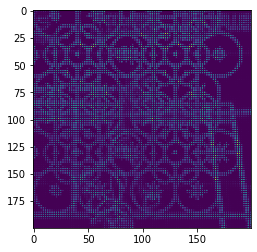

In [4]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
        new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))

#         sift = cv2.SIFT_create()
#         keypoints_1, descriptors_1 = sift.detectAndCompute(new_array,None)
#         new_array = cv2.drawKeypoints(new_array,keypoints_1,new_array)
        
        descs, new_array = daisy(new_array, step=90, radius=40, rings=2, histograms=6,
                         orientations=8, visualize=True)
        
        fd, new_array = hog(new_array, orientations=9, pixels_per_cell=(2, 2),
                         cells_per_block=(5, 5), visualize=True)

        plt.imshow(new_array)
        plt.show()
        break
    break

In [ ]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
                img_array=cv2.imread(os.path.join(path,img))
#                 img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
#                 descs, new_array = daisy(new_array, step=180, radius=58, rings=2, histograms=6,
#                          orientations=8, visualize=True)
                fd, new_array = hog(new_array, orientations=9, pixels_per_cell=(2, 2),
                        cells_per_block=(5, 5), visualize=True, multichannel=True)
                training_data.append([new_array,class_num])
        
create_training_data()      

In [6]:
print(len(training_data))

0


In [7]:
lenofimage = len(training_data)

In [8]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)

ValueError: cannot reshape array of size 0 into shape (0,newaxis)

In [ ]:
X.shape

In [ ]:
X = X/255.0

In [ ]:
X[1]

In [ ]:
y=np.array(y)

In [ ]:
y.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

# --------K-Means---------

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit(X_train,y_train)

In [ ]:
# predict for one observation
kmeans.predict(X_test[0].reshape(1,-1))

In [ ]:
# predict for multiple observation (images) at once
kmeans.predict(X_test[0:10])

In [ ]:
# make prediction on entire test data
predictions = kmeans.predict(X_test)

In [ ]:
print('KMeans Accuracy: %.3f' % accuracy_score(y_test,predictions))

In [ ]:
cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,predictions))
plt.title(all_sample_title,size=15)

In [ ]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,predictions))

In [ ]:
sse = []
list_k = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32]
for k in list_k:
    km = KMeans(n_clusters=k)
    clusters = km.fit_predict(X)
    sse.append(km.inertia_)
    predictions = km.predict(X_test)
    print(f"Accuracy for k = {k}: ", accuracy_score(y_test,predictions))
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data_frame)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg.append(silhouette_score(data_frame, cluster_labels))plt.plot(range_n_clusters,silhouette_avg,’bx-’)
    
plt.xlabel(‘Values of K’) 
plt.ylabel(‘Silhouette score’) 
plt.title(‘Silhouette analysis For Optimal k’)
plt.show()

In [ ]:
result = pd.DataFrame({'original' : y_test,'predicted' : predictions})


In [ ]:
result